<a href="https://colab.research.google.com/github/R0N3ldrt/Thesis/blob/main/plot_reference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necesary libraries
# Libraries for correct code execution 

import os, time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import pickle
import random
import csv
import re
import array
import seaborn as sns
from tqdm import tqdm
import tensorflow as tf
import os.path

from functools import reduce
from random import random, gauss
from math import modf, pi, cos, sin, sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from plotly.subplots import make_subplots
from scipy.signal import savgol_filter
from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr

import scipy.stats as st
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from keras.models import Sequential
from keras.layers import Dense,Conv2D, Flatten
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping
from sklearn.mixture import GaussianMixture
import os, time, math, csv, joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture

import os, time, math, csv, joblib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture

import warnings
warnings.filterwarnings("ignore")

sns.set_theme()

In [2]:
# BLOQUE PARA USAR DESDE COLAB

# Google drive loading as work station for local-usage of the files.
from google.colab import drive
drive.mount('/content/gdrive',force_remount= True)

#-----------------------------------------------------------------------------

Mounted at /content/gdrive


In [3]:
# Lista para cambiar los paths rapido.
workers = ["Ronald", "Local"]

# Change the number to change the paths.
worker = workers[0]

if worker == "Ronald":
  path = "/content/gdrive/MyDrive/Thesis_Workstation/ANN_dataset"
else: path = os.getcwd()

# Processing

In [5]:
input_path = path + "/Spectrum/16QAM_v2/Copy of dataSet_gamma0_Spectrum31MHz_Samples_16QAM_75GHz_LongHaul_input_25x81km_primeStep.xlsx"
df = pd.read_excel(input_path, sheet_name = "Sheet1", skiprows=1)
df.iloc[0].fillna(method='bfill', inplace=True)
df.iloc[1:df.shape[0]].fillna(method='pad', inplace=True)
# Adding missing PBRS_id
snippet = []
val_cnt = 1
idx = 0
for sample in range(1, 101):
  for sample_id in range(0, 25):
    df.at[idx, 'PBRS_id'] = val_cnt
    idx +=1
    snippet.append(val_cnt)
  val_cnt += 1
df['PBRS_id'] = df['PBRS_id'].astype(int)

In [8]:
df

,row,PBRS_id,Channels,Distance_km,power_dBm,#span,-40,-39.96875,-39.9375,-39.90625,...,39.7187499999999,39.7499999999999,39.7812499999999,39.8124999999999,39.8437499999999,39.8749999999999,39.9062499999999,39.9374999999999,39.9687499999999,39.9999999999999
0,1,1,1,80,0,1,-53.689001,-56.121881,-51.975867,-71.212099,...,-335.056696,-328.066995,-325.754530,-328.066995,-328.066995,-325.395278,-321.992445,-328.886037,-322.977492,-335.056696
1,2,1,1,160,0,2,-58.397983,-63.706537,-43.296967,-42.767908,...,NaN,-321.746918,-326.565933,-322.586533,-341.617433,-322.586533,NaN,-331.617433,-328.607133,-328.144133
2,3,1,1,240,0,3,-59.608427,-45.821385,-40.800238,-38.915364,...,-326.872508,-333.434423,-329.882808,-329.882808,-331.686340,-325.665740,-335.903408,-326.872508,-329.882808,-328.913708
3,4,1,1,320,0,4,-52.331092,-44.512341,-36.796021,-36.463689,...,-336.294415,-330.273815,-329.274286,-329.304715,-321.242915,-320.731390,-328.335615,-325.154982,-326.294415,-330.273815
4,5,1,1,400,0,5,-45.970998,-45.981552,-37.546347,-35.068303,...,-331.093800,-336.602875,-329.274286,-329.155600,-324.104100,-320.731390,-333.027762,-325.154982,-343.135000,-337.114400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,100,1,1680,0,21,-35.045286,-35.526149,-41.648287,-38.366570,...,-43.573630,-50.919320,-36.562509,-46.837200,-49.377540,-39.236752,-48.296435,-45.502409,-44.768676,-41.479943
2496,2497,100,1,1760,0,22,-34.874179,-33.333928,-41.698931,-42.184765,...,-43.573630,-50.919320,-36.562509,-46.837200,-49.377540,-39.236752,-48.296435,-45.502409,-44.768676,-41.479943
2497,2498,100,1,1840,0,23,-37.236302,-33.808539,-39.782767,-38.180428,...,-43.573630,-50.919320,-36.562509,-46.837200,-49.377540,-39.236752,-48.296435,-45.502409,-44.768676,-41.479943
2498,2499,100,1,1920,0,24,-37.448191,-34.298780,-40.370614,-36.645255,...,-43.573630,-50.919320,-36.562509,-46.837200,-49.377540,-39.236752,-48.296435,-45.502409,-44.768676,-41.479943


In [19]:
df

,row,PBRS_id,Channels,Distance_km,power_dBm,#span,-40,-39.96875,-39.9375,-39.90625,...,39.7187499999999,39.7499999999999,39.7812499999999,39.8124999999999,39.8437499999999,39.8749999999999,39.9062499999999,39.9374999999999,39.9687499999999,39.9999999999999
0,1,1,1,80,0,1,-53.689001,-56.121881,-51.975867,-71.212099,...,-335.056696,-328.066995,-325.754530,-328.066995,-328.066995,-325.395278,-321.992445,-328.886037,-322.977492,-335.056696
1,2,1,1,160,0,2,-58.397983,-63.706537,-43.296967,-42.767908,...,NaN,-321.746918,-326.565933,-322.586533,-341.617433,-322.586533,NaN,-331.617433,-328.607133,-328.144133
2,3,1,1,240,0,3,-59.608427,-45.821385,-40.800238,-38.915364,...,-326.872508,-333.434423,-329.882808,-329.882808,-331.686340,-325.665740,-335.903408,-326.872508,-329.882808,-328.913708
3,4,1,1,320,0,4,-52.331092,-44.512341,-36.796021,-36.463689,...,-336.294415,-330.273815,-329.274286,-329.304715,-321.242915,-320.731390,-328.335615,-325.154982,-326.294415,-330.273815
4,5,1,1,400,0,5,-45.970998,-45.981552,-37.546347,-35.068303,...,-331.093800,-336.602875,-329.274286,-329.155600,-324.104100,-320.731390,-333.027762,-325.154982,-343.135000,-337.114400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,100,1,1680,0,21,-35.045286,-35.526149,-41.648287,-38.366570,...,-43.573630,-50.919320,-36.562509,-46.837200,-49.377540,-39.236752,-48.296435,-45.502409,-44.768676,-41.479943
2496,2497,100,1,1760,0,22,-34.874179,-33.333928,-41.698931,-42.184765,...,-43.573630,-50.919320,-36.562509,-46.837200,-49.377540,-39.236752,-48.296435,-45.502409,-44.768676,-41.479943
2497,2498,100,1,1840,0,23,-37.236302,-33.808539,-39.782767,-38.180428,...,-43.573630,-50.919320,-36.562509,-46.837200,-49.377540,-39.236752,-48.296435,-45.502409,-44.768676,-41.479943
2498,2499,100,1,1920,0,24,-37.448191,-34.298780,-40.370614,-36.645255,...,-43.573630,-50.919320,-36.562509,-46.837200,-49.377540,-39.236752,-48.296435,-45.502409,-44.768676,-41.479943


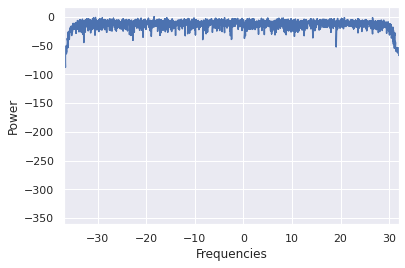

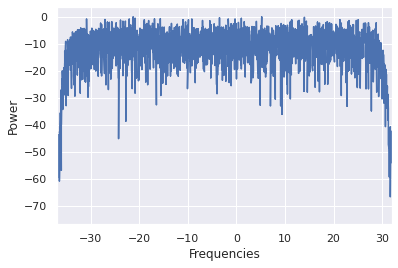

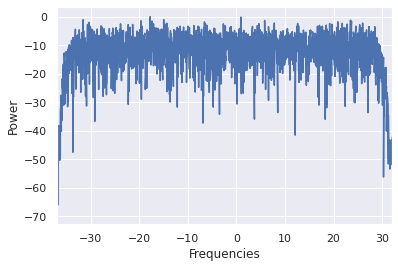

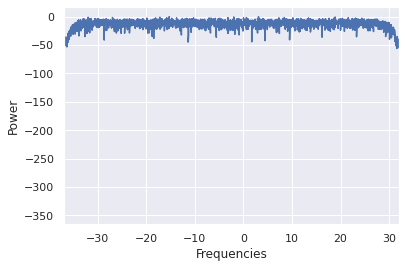

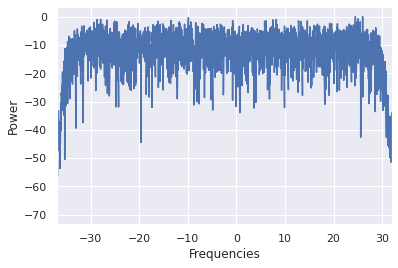

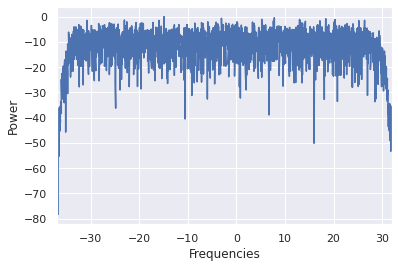

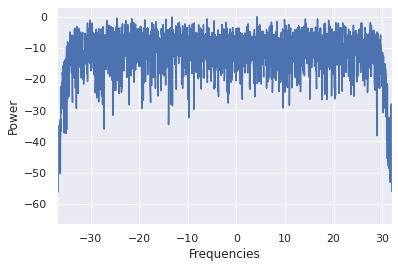

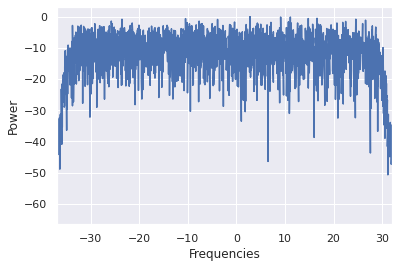

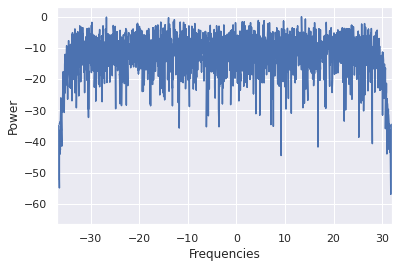

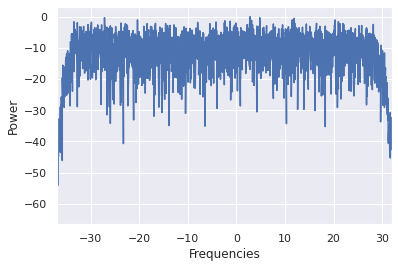

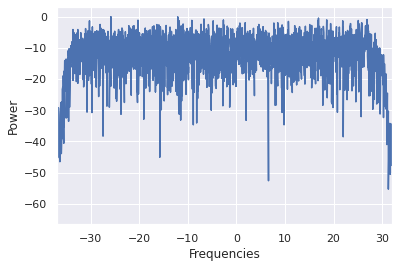

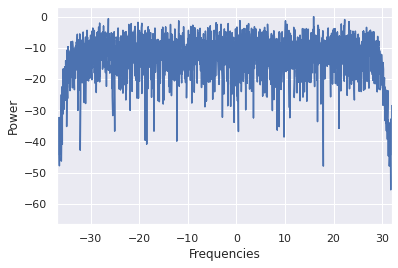

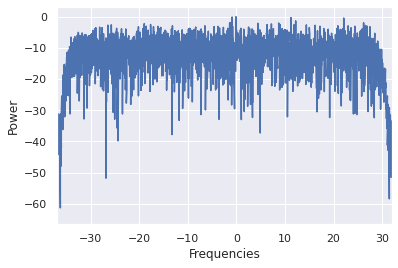

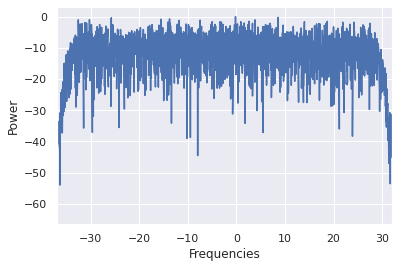

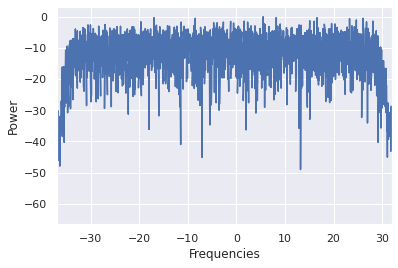

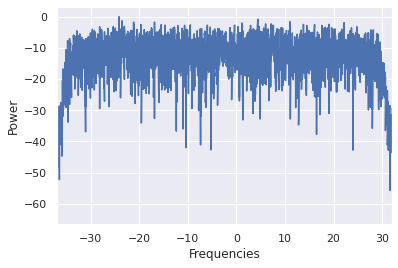

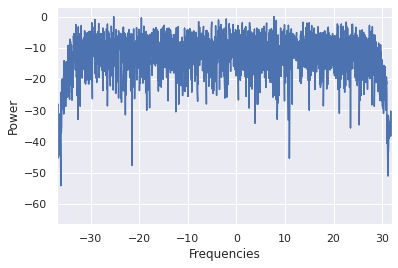

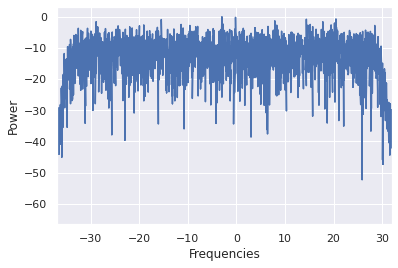

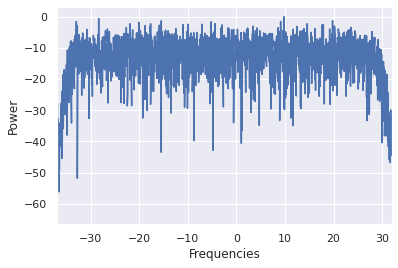

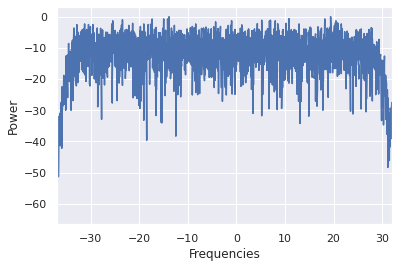

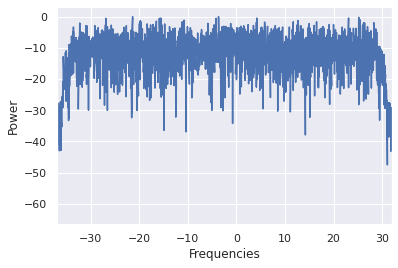

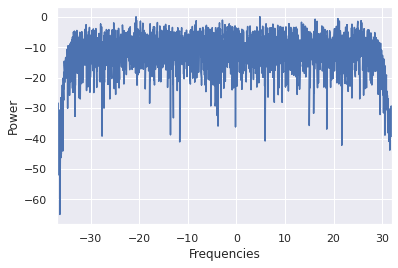

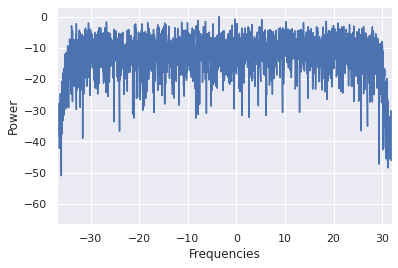

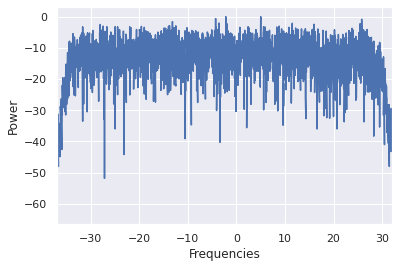

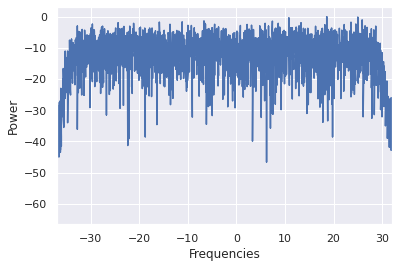

In [69]:
distances = [x*80 for x in range(1,26)]
ids = [1, 4, 5, 10, 17, 20, 23, 29, 31, 38, 45, 57, 50, 55, 62, 65, 70, 76, 79, 84, 87, 91, 95, 97, 100]
i = 0
for d in distances:
  id_df = df[(df['PBRS_id'] == ids[i])]
  dist_df = id_df[(id_df['Distance_km'] == d)]
  selected_val_df = dist_df.iloc[:, 6:dist_df.shape[1]].values.tolist()[0]
  selected_col_df = dist_df.iloc[:, 6:dist_df.shape[1]].columns.values
  x_axis = [round(v, 1) for v in selected_col_df]
  y_axis = [round(v, 1) for v in selected_val_df]
  plt.figure(figsize=(6, 4))
  plt.plot(x_axis, y_axis)
  plt.xlabel('Frequencies')
  plt.ylabel('Power')
  plt.xlim(np.min(x_axis)+3, np.max(x_axis)-8)
  plt.savefig(path+'/plot_reference/plot_id_'+str(ids[i])+'_d_'+str(d)+'.png')
  plt.show()
  i+=1